# Recommendation Systems

Usage
Amazon, Netflix, Youtube, and many other big corporate companies use this machine learning algorithm to make sure they display what might be an interest for you.

There are two kind of recommendations, Content-based recommendations, and Collaborative-based recommendations. and there's a third which is a combination of both.

Content-based is self explanatory, you get recommendations based on your recent activities.
Collaborative-based is when we look for users with similar interests or habits and recommend the same items to them.
![content-filtering](https://i.imgur.com/TJkz2Oh.png)


# Content-Based Movie Recommendations (Project)

In [1]:
# EDA
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('data/IMDb movies.csv')
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [4]:
# We noticed year isn't an int dtype, looking a the unique values
# will help us spot the string here.
df['year'].unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [5]:
# Now we found that, we change TV Movie 2019 to 2019
# Change year Dtype to int
mask = df['year'] == 'TV Movie 2019'
df.loc[mask, 'year'] = 2019
df['year'] = df['year'].astype(int)

In [6]:
df['date_published'].unique()

array(['1894-10-09', '1906-12-26', '1911-08-19', ..., '2020-10-22',
       '2019-01-13', '2020-09-04'], dtype=object)

In [7]:
# Change "TV Movie 2019" to it's proper date
mask = df['date_published'] == 'TV Movie 2019'
df.loc[mask,'date_published'] = '2019-09-08'
# Change date_published to datetime
df['date_published'] = pd.to_datetime(df['date_published'], format="%Y-%m-%d")

In [8]:
# removing strings from budget and converting it to int64
df['budget'] = df['budget'].str.replace(r'\D', '')
df['budget'] = df['budget'].replace(np.nan, 0)
df['budget'] = df['budget'].astype(np.longlong)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   imdb_title_id          85855 non-null  object        
 1   title                  85855 non-null  object        
 2   original_title         85855 non-null  object        
 3   year                   85855 non-null  int32         
 4   date_published         85855 non-null  datetime64[ns]
 5   genre                  85855 non-null  object        
 6   duration               85855 non-null  int64         
 7   country                85791 non-null  object        
 8   language               85022 non-null  object        
 9   director               85768 non-null  object        
 10  writer                 84283 non-null  object        
 11  production_company     81400 non-null  object        
 12  actors                 85786 non-null  object        
 13  d

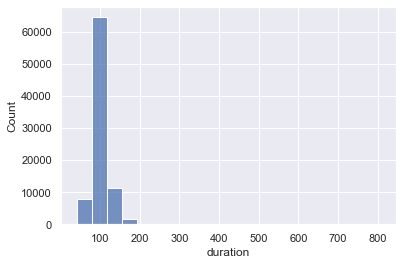

In [10]:
# An overview of the majority of movies on the duration metric
# 2h seems reasonable, I know I would be less likely to watch a 3 hours movie.
sns.set(style="darkgrid")
sns.histplot(data=df['duration'], bins=20);

In [11]:
# It seems we have an outliers here, let's find how many
# observations we have for movies post 200 minutes.

dur_mask = df['duration'] > 200
dur_mask = df.loc[dur_mask]
dur_mask['duration'].count()

240

In [12]:
# 240 of 85k observations is still less than 1%
# We could drop these rows to have a more balanced view here.
df = df.drop(df[df.duration > 200].index)
df.shape

(85615, 22)

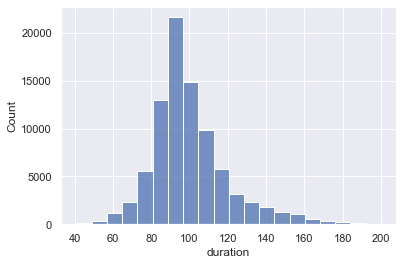

In [13]:
# That's more like it.
sns.set(style="darkgrid")
sns.histplot(data=df['duration'], bins=20);

In [14]:
# As we can see from the histogram that most movies
# have a duration of 75 ~ 120 minutes.

In [15]:
# Overview of where the NaN values are.
# We see here we have some in of the features we are concerned with here.
# director - actors - description
df.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   825
director                    85
writer                    1563
production_company        4439
actors                      69
description               2111
avg_vote                     0
votes                        0
budget                       0
usa_gross_income         70332
worlwide_gross_income    54661
metascore                72345
reviews_from_users        7580
reviews_from_critics     11761
dtype: int64

<AxesSubplot:xlabel='count', ylabel='year'>

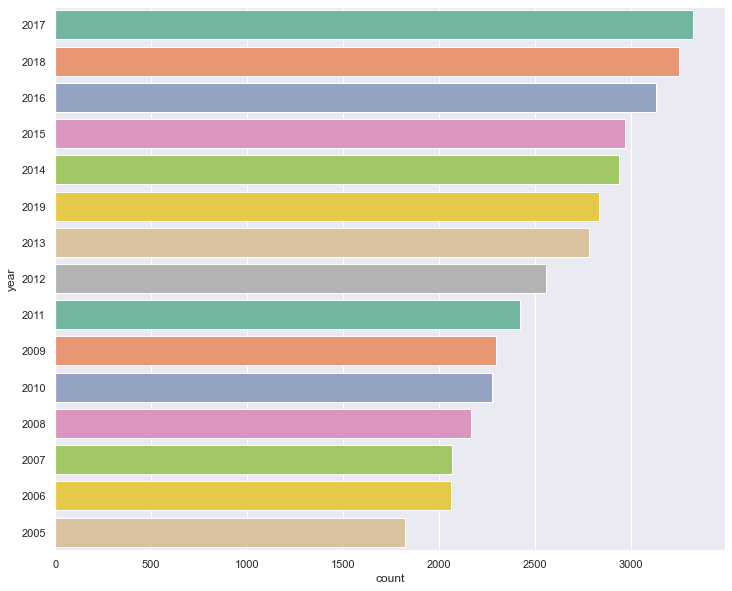

In [16]:
# Just for curiosity, let's look how many movies get released each year.
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="year", data=df, palette="Set2", order=df['year'].value_counts().index[0:15])

In [17]:
df.genre.head(3)

0                    Romance
1    Biography, Crime, Drama
2                      Drama
Name: genre, dtype: object

In [18]:
# Let's look what is the most common genres in movies.
# Since movies can have multiple genres, we have to make sure that "Drama" counted 
# each time whether when it's in "Biography, Crime, Drama" or simply "Drama".
genres = df.assign(genres=df.genre.str.split(", ")).explode('genres')

<AxesSubplot:xlabel='count', ylabel='genres'>

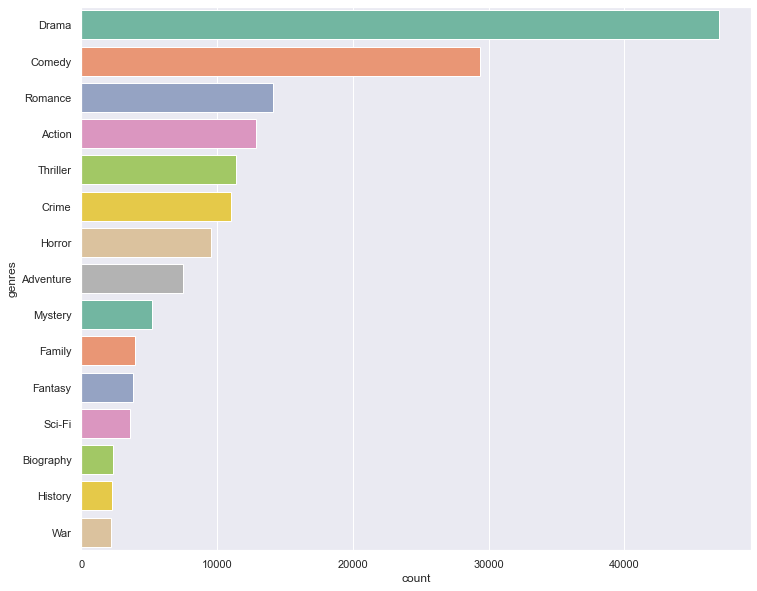

In [19]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="genres", data=genres, palette="Set2", order=genres['genres'].value_counts().index[0:15])

In [20]:
# Sort by number of votes to get the popular movies.
df = df.sort_values(by="votes",ascending=False)

# Slicing the Data for easier processing - RIP RAM
df = df.iloc[:40000]

# Finding correlations

In [21]:
# There is some correlations between the movie's duration
# and the number of votes registered. # Don't forget we removed any movie
# with more than 200 minutes, since they represented less than 1% of the whole data.
df[['duration','votes']].corr()

# There is a weak correlation here.

,duration,votes
duration,1.000000,0.155892
votes,0.155892,1.000000


In [22]:
# First, making sure we take care of missing values in budget by a mask.
# Then looking if the budget of the movie affects the overall average vote.
budget_mask = df['budget'] > 0
budget = df.loc[budget_mask]
budget[['budget','votes']].corr()

# There's no correlation here.

,budget,votes
budget,1.00000,-0.00059
votes,-0.00059,1.00000


In [23]:
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
28453,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0
48078,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615,185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0
57475,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,...,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,8.8,2002816,160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0


In [24]:
# get rid of NaN
df_na = df.fillna('')

# Creating the necessary functions
# make all words in lower case, and remove the spaces
# for easier, and higher accuracy to find exact occurences.
def lowerStr(x):
    return str.lower(x.replace(" ",''))

# applying the function
# First need to make our features, into a dataframe
# Since apply works on DF
finaldf = df_na[['original_title','director','actors', 'description','genre']]

for feature in finaldf:
    finaldf[feature] = finaldf[feature].apply(lowerStr)

finaldf.head()

,original_title,director,actors,description,genre
28453,theshawshankredemption,frankdarabont,"timrobbins,morganfreeman,bobgunton,williamsadl...","twoimprisonedmenbondoveranumberofyears,finding...",drama
48078,thedarkknight,christophernolan,"christianbale,heathledger,aaroneckhart,michael...",whenthemenaceknownasthejokerwreakshavocandchao...,"action,crime,drama"
57475,inception,christophernolan,"leonardodicaprio,josephgordon-levitt,ellenpage...",athiefwhostealscorporatesecretsthroughtheuseof...,"action,adventure,sci-fi"
32487,fightclub,davidfincher,"edwardnorton,bradpitt,meatloaf,zachgrenier,ric...",aninsomniacofficeworkerandadevil-may-caresoapm...,drama
28381,pulpfiction,quentintarantino,"timroth,amandaplummer,lauralovelace,johntravol...","thelivesoftwomobhitmen,aboxer,agangsterandhisw...","crime,drama"


In [25]:
# take a note of the description for later explaination
# two imprisoned men bond over a number of years

In [26]:
# creating the function for merging the columns
def merge_features(df):
    return df['original_title']+" "+df['director']+" "+df['actors']+" "+df['description']+" "+df['genre']

finaldf['concat'] = finaldf.apply(merge_features, axis=1)
finaldf['concat'].head(3)

28453    theshawshankredemption frankdarabont timrobbin...
48078    thedarkknight christophernolan christianbale,h...
57475    inception christophernolan leonardodicaprio,jo...
Name: concat, dtype: object

# Modelling

### Choosing the Model
When it comes to finding similar items from a data, there's a few models we can use.
___
![cosine similarity, euclicean distance, manhattan](https://i.imgur.com/h39lZ2e.png)
___
Since calculating the distance between each item is not a priority here, I opted to use cosine-similarity. Getting the items from the same orientation would be enough here. Also, I need to work with text and count their occurences.

In [27]:
# Modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
# Vectorize Text, and fitting
cv = CountVectorizer() #init
count_matrix = cv.fit_transform(finaldf['concat'])

In [29]:
# Finding the similarities
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [30]:
# Resetting the index, then making a new series with original title as index.
finaldf = finaldf.reset_index()
indices = pd.Series(finaldf.index, index=finaldf['original_title'])

In [31]:
def recommend(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    #print(indices[title])
    #print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print(sim_scores)
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    #print(movie_indices)
    return df['original_title'].iloc[movie_indices]

In [33]:
recommend('toY SToR Y')

31096            Toy Story 2
46673            Toy Story 3
63599            Toy Story 4
3274      Gulliver's Travels
35865         Monsters, Inc.
31209           A Bug's Life
13818       Yellow Submarine
69560    Oggy et les cafards
81935                 Onward
44479            Ratatouille
Name: original_title, dtype: object

# Possible Improvements
- Keywords instead of description.
- Take Year of the into account.